# Dealing with Imbalanced Data Sets

Author: Jeff Gross

The objective is to explore different approaches to tackling imbalanced data sets, in this case for fraud detection. This notebook will walk you through six classification algorithm with two over-sampling and three under-sampling techniques of working with unbalanced data, This data was retrieved from the kaggle website with the pre-processing step of the data already complete. 

Regular algorithms are often biased towards the majority class because of their loss functions attempt to optimize error rate, without taking the data distribution into consideration. In the worst case, minority examples are treated as outliers of the majority class and ignored.

# Data Dictionary

The dataset contains transactions made by credit cards in the month of September 2013 by european cardholders. All of the observations occur in a two day span, where we there were 492 frauds out of 284,807 transactions. The dataset was collected and analysed by the Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The data only contains numerical variables which are the result of a PCA transformation. The PCA transformation was for security and confidentiality reasons.

* Features V1, V2, ... V28 are the principal components obtained with PCA
* 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
* 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* 'Class' is the response variable and it takes value **1 in case of fraud and 0 otherwise.**


**Contents:**
* [Exploratory Data Analysis](#0)
    * [Response Variable](#0.1)
    * [Other Features](#0.2)
    
    
* [Imbalanced Data](#1)


* [Models](#2)
    * [Logistic Regression with Imbalanced Data](#2.1)
        * [Undersampling Techniques](#2.1.1)
        * [Oversampling Techniques](#2.1.2)

    * [Random Forest Classifier](#2.2)
        * [Undersampling Techniques](#2.2.1)
        * [Oversampling Techniques](#2.2.2)
        
    * [Support Vector Classifier](#2.3)
        * [Undersampling Techniques](#2.3.1)
        * [Oversampling Techniques](#2.3.2)
    * [Extreme Gradient Boosting Classifier](#2.4)
        * [Undersampling Techniques](#2.4.1)
        * [Oversampling Techniques](#2.4.2)
    * [Neural Network](#2.5)

## Results

The six different algorithms that were used in this study were logistic regression, random forest classifer, support vector classifier, XGBoost, and Neural Networks. The oversampling techniques were random over sampling and synthetic minority oversampling techinque (SMOTE). The undersampling techniques were random under sampling, edited nearest neighbor, and condensed nearest neighbors. I focused on the f1 score in my analysis.  It is also a valid measure of an accurate model. It is the harmonic mean of precision and recall, and will be more insensitive to imbalanced data.

Of the six different algorithms that were used to predict this imbalanced data seet, the best algorithm was random forest classifier, without under or oversampling, with an average F1 score of .82.  Second place went to XGBoost without under or oversampling with an average F1 score of .68. Third place went to logistic regression utilizing an L1 regularization penalty with an average F1 score of .66 and logistic regression with under sampling utilizing edited nearest neighbors also with an average F1 score of .66. Fourth place went to Random Forest Classifier with oversampling using SMOTE with an average F1 score of .62. 

<a id='0'></a>
# Exploratory Data Analysis
In this first section of the notebook I will go through and explore some of the features. I will look at their structure in the dataset, look to validate the pre-processing steps, and visualize the data to get a better understanding.

The dataset can be found here and downloaded for interactive use with this notebook:
https://www.kaggle.com/dalpozz/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# pandas function to read in a csv file
df = pd.read_csv('creditcard.csv')

In [3]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<a id='0.1'></a>
## Response Variable / Dependent Variable
After getting an understanding for the structure of the data we can dive into different inquiries about certain features of the data. Like mentioned in the introduction the class has a very imbalanced data set where majority of the observations are non-fraudulant. There are only 492 fraud observations as it is noted below. 

In [5]:
Counter(df['Class'])

Counter({0: 284315, 1: 492})

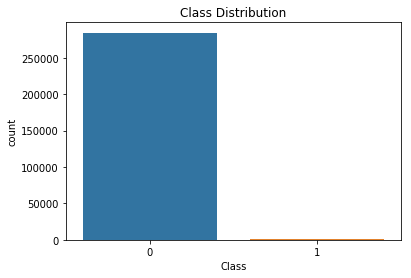

In [6]:
sns.countplot(df['Class']);
plt.title('Class Distribution');

Below is an interactive map that incorporates a box plot for any selected feature with the x-axis represented by Class. This is very useful because you can see how each of the features are represented by the class. You might have a few features that are majority for one class or another.

In [7]:
# this is an interactive map that allows you to look at the boxplot between the response and other variables. 
from ipywidgets import interact
%matplotlib inline

column_name = list(df.columns)

@interact
def box_plot(Feature= column_name):
    sns.boxplot(df['Class'], df[Feature])

A Jupyter Widget

We also know from the introduction that part of the pre-processing step was already completed, which we can see from zero missing values.

In [8]:
df.isnull().sum() # There is no missing or null values in this dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Okay, so what does this dataset consist of? The describe function allows us to get a few of the descriptive statistics of each of the variables, which may be useful for the pca components since we do not necessarily know what they are. 

In [9]:
# select any index value to get the summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Something to give us a better concept of what each PCA component entails below is an interactive scatterplot matrix of the class variable and any other specified feature in the data. The plot also gives the distribution for each of the features picked where you can determine if any transformations should be applied.

A Jupyter Widget

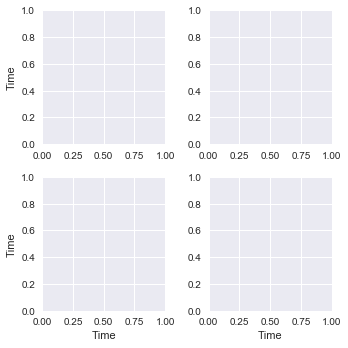

In [10]:
%matplotlib inline

@interact
def sns_scatter(Feature_x=column_name, Feature_y=column_name):
    
    scatter_list = [Feature_x, Feature_y]

    sns.set(color_codes=True)
    sns.pairplot(df[scatter_list])

<a id='1'></a>
# Imbalanced Data:

* **Accuracy paradox**: which is the case where we get a higher accuracy percentage because it is reflecting the underlying class distribution. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.
    * Conventional algorithms are often biased towards the majority class because their loss functions attempt to optimize quantities such as error rate, not taking the data distribution into consideration. 
    * In some cases, minority examples may even be treated as outliers of the majority class and ignored, or the learning algorithm generates a classifier that classifies every example as the majority class.

**List of Techniques**
1. **Collect more data**, which is not plausible in this case.
2. **Use a different scoring method**. Accuracy will be biased towards the majority class, and the F1 or ROC_AUC score will be a better estimator for true positives. 
    A few key terms for classification and accuracy:

    __Accuracy__ = TP+TN/Total

    __Precison__ = TP/(TP+FP)

    __Recall__ = TP/(TP+FN)

    __F1__ = (Precison * Recall) / (Precison + Recall)

    __TP__ = True positive, number of cases that were positive and predicted positive

    __TN__ = True negative, number of cases that were negative and predicted negative

    __FP__ = False possitve, number of cases that were negative and predicted positive 

    __FN__= False Negative, number of cases that were positive and predicted negative 

    It is always a trade off for which one will affect you more FP or FN, it comes down to the scope of the project or business goal.

    Using accuracy yeilds a much higher result compared to the average_precision score (area under the precision-recall curve).This is because if one of the classes has a large sample size they are going to have more weight for the numerator, which when divided by the denominator will yeild a high accuracy. (Once you get to the classification report, look at the support column and you can verify the amount of imbalanced data in your sample.) 

    The f1 score is also a valid measure of an accurate model. This is the harmonic mean of precision and recall, and will be more insensitive to imbalanced data.

3. **Resample the dataset** so that the sample you use to build the model is more balanced. 

    __imblearn.under_sampling__ deletes instances from the over-represented class. 
        
    __imblearn.over_sampling__ adds copies of instances from the under-represented class (sampling with replacement).
  
    __Over-sampling followed by under-sampling__
  
4. **Try different algorithms**. For example decision trees use the decision boundary to split the data by looking at the class variable, and will allow both classes to be addressed. 

5. **Try penalizing the model**. There are different algorithms that are specific to penalizing class and weights. 

In [11]:
def logistic_model(X_trn, y_trn, X_tst, y_tst):
    """create a function for logistic regression"""
    
    logreg = LogisticRegression(penalty='l1')
    logreg.fit(X_trn, y_trn)
    y_pred = logreg.predict(X_tst)

    return get_scores(y_tst, y_pred)

def get_scores(y_tst, pred):
    print('Accuracy Score: {}\n'.format(accuracy_score(y_tst, pred)))
    print('Average Precision Score: {}\n'.format(average_precision_score(y_tst, pred))) 
    print('Average F1 Score: {}'.format(f1_score(y_tst, pred)))

def model_scores(y_tst, pred):
    print('Accuracy Score: {}\n'.format(accuracy_score(y_tst, pred)))
    print('Average Precision Score: {}\n'.format(average_precision_score(y_tst, pred))) 
    print('Average F1 Score: {}'.format(f1_score(y_tst, pred)))
    
    cnf_matrix=confusion_matrix(y_tst, pred)

    fig= plt.figure(figsize=(6,3))

    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(y_tst,pred))
    
def make_roc_curve(estimator, X_trn, y_trn, X_tst, y_tst):
    # ROC_AUC score
    y_pred_score = estimator.fit(X_trn, y_trn.values.ravel()).decision_function(X_tst.values)

    fp, tp, thresholds = roc_curve(y_tst.values.ravel(), y_pred_score)
    roc_auc = auc(fp,tp)

    # Plot ROC
    plt.title('ROC_CURVE')
    plt.plot(fp, tp, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

<a id='2'></a>
## Models

<a id='2.1'></a>
## Logistic Regression with the imbalanced classes

I use logistic regression in this case to show the different methods of working with imbalanced data. The first model will start with the original train and test, then we will use under_sample and over_sampling methods to see which works best.

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import roc_curve, auc, f1_score
from collections import Counter

C:\Users\Y\.conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


I split the data into test and train, and print the class imbalance for each dataset with the initial imbalance at the top.

In [26]:
y = df['Class']
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# one was to see the counts per class
print('Original Data {}'.format(Counter(df['Class'])))
print('Train Data {}'.format(Counter(y_train)))
print('Test Data {}'.format(Counter(y_test)))

Original Data Counter({0: 284315, 1: 492})
Train Data Counter({0: 227440, 1: 405})
Test Data Counter({0: 56875, 1: 87})


In [15]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logpred = logreg.predict(X_test)
get_scores(y_test, logpred)

Accuracy Score: 0.9991397773954567

Average Precision Score: 0.45728395353457785

Average F1 Score: 0.6620689655172414


The ROC curve represents how the classifier is performing. The x-axis is the false positive rate and the y-axis is the true positive rate or recall. We want the ROC curve to be as close to the upper left hand corner as possible, which shows that we have classified all instances correctly. The area under the curve is the percentage of tradeoff between sensitivity (true positives) and specificity (1-false positives).

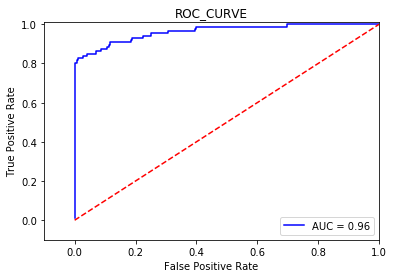

In [17]:
make_roc_curve(logreg, X_train, y_train, X_test, y_test)

<a id='2.1.1'></a>
## Under_sampling Data

Under-sampling will downsample the majority class. Some people view that the disadvantage to under-sampling is that valuable data is being discarded, and is making the independent variables look like they have a higher variance between features.

One article that argues for undersampling with a mathematical foundation is called *Class Imbalance* (by Wallace, Small, Bradley, and Trikalinos4). Their argument is that two classes must be distinguishable in the tail of some distribution of an explanatory variable. 

**Random Under Sampling**: 

Drops data from the majority class at random, usually until response is balanced.

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [19]:
rus = RandomUnderSampler(replacement=False, random_state = 1)
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

print('Original train set was {} and Random Under train set was {}.'.format(len(y_train), len(y_train_rus)))

Original train set was 227845 and Random Under train set was 810.


Now lets apply it to the Logistic Regression model and see its performance.

In [20]:
logistic_model(X_train_rus, y_train_rus, X_test, y_test)

Accuracy Score: 0.971911098627155

Average Precision Score: 0.04105703451021875

Average F1 Score: 0.08779931584948689


So the results were not too good running it through logistic regression. But that was just an example to show the steps of how to resample and apply it to the model. 

The next step will take what we have just done another step further and include that entire step into a pipeline. The pipeline runs the two in parallel and then fits the model on the train and test. 

As an additional step we will later go through and see how a gridsearch is then applied to run a cross validation itteration over the model.

In [21]:
random_imb_pipe = make_pipeline(RandomUnderSampler(replacement=False, random_state=1), LogisticRegression())
scores_f1 = cross_val_score(random_imb_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

Average Cross Validated F1 Score: 0.113664347258


Accuracy Score: 0.9991222218320986

Average Precision Score: 0.4645019039729779

Average F1 Score: 0.6753246753246753


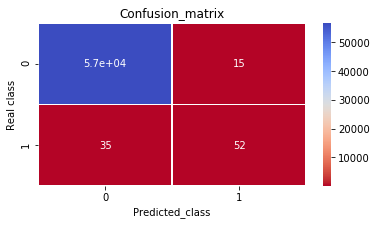


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.78      0.60      0.68        87

avg / total       1.00      1.00      1.00     56962



In [25]:
log = LogisticRegression()
log_model = log.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

model_scores(y_test, log_pred)

**Edited Nearest Neighbors**: 

Removes all instances that are misclassified nearest neighbors from the training set.

In a sense it take cares of outliers or boundary issues, because removes nearest neighbors in the classified 'all' section. That means if there are a few data points that are not being classified towards a specific class, and tend to be classified as anything. Below we will do a similar logistic regression model using this function to see the results.

In [15]:
from imblearn.under_sampling import EditedNearestNeighbours

In [21]:
ekk = EditedNearestNeighbours(n_neighbors=5, random_state = 1)
X_train_enn5, y_train_enn5 = ekk.fit_sample(X_train, y_train)

print('Original Training set & Edited Nearesr Neighbors Sample set:', [len(y_train), len(y_train_enn5)])

('Original Training set & Edited Nearesr Neighbors Sample set:', [227845, 227186])


Unlike the random sampling, this method barely shrunk the data. If you noticed the parameters that I have been using are the default parameters, which can be adjusted. Lets try the same model again with an increased n_neighbors at 10.

In [27]:
from imblearn.under_sampling import EditedNearestNeighbours

In [22]:
enn = EditedNearestNeighbours(n_neighbors=10, random_state = 1)
X_train_enn10, y_train_enn10 = ekk.fit_sample(X_train, y_train)

print('Original Training set & Edited Nearesr Neighbors Sample set:', [len(y_train), len(y_train_enn10)])

('Original Training set & Edited Nearesr Neighbors Sample set:', [227845, 226237])


Even with ten we are still only 1000 parameters off. Lets see what the results show then adjust the parameters one more time.

In [23]:
logistic_model(X_train_enn10, y_train_enn10, X_test, y_test)

Accuracy Score: 0.999139777395

Average Precision Score: 0.457283953535

Average F1 Score: 0.662068965517


In [24]:
enn_imb_pipe = make_pipeline(EditedNearestNeighbours(n_neighbors=15, random_state=1), LogisticRegression())
scores_f1 = cross_val_score(ekk_imb_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

('Average Cross Validated F1 Score:', 0.68150267180585933)


Accuracy Score: 0.9989466661985184

Average Precision Score: 0.38449276292298706

Average F1 Score: 0.6153846153846154


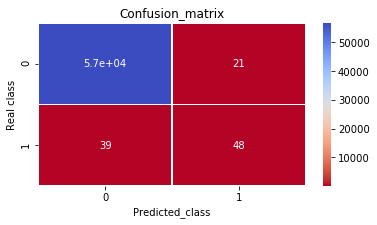


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.70      0.55      0.62        87

avg / total       1.00      1.00      1.00     56962



In [29]:
enn_15 = EditedNearestNeighbours(n_neighbors=15, random_state = 1)
X_train_enn15, y_train_enn15 = enn_15.fit_sample(X_train, y_train)

log = LogisticRegression()
log_enn15 = log.fit(X_train_enn15, y_train_enn15)

log_pred_enn15 = log_enn15.predict(X_test)

model_scores(y_test, log_pred_enn15)

Well the edited nearest neighbor with 15 is performing a lot better, even if the class is still very imbalanced. 

Another one similar to edited nearest neighbors is condensed nearest neighbors.

**Condensed Nearest Neighbors**:

Opposite of edited nearest neighbors it will itteratively add points to data misclassified by K-nearest neighbors. Generally will remove a lot of points from majority class. 

In [16]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
cnn = CondensedNearestNeighbour(n_neighbors=5, random_state = 1)
X_train_cnn5, y_train_cnn5 = cnn.fit_sample(X_train, y_train)

print('Original Training set & Condensed Nearest Neighbor Sample set:', [len(y_train), len(y_train_cnn5)])

In [51]:
logistic_model(X_train_cnn5, y_train_cnn5, X_test, y_test)

Accuracy Score: 0.987395105509

Average Precision Score: 0.0790783049954

Average F1 Score: 0.168981481481


Accuracy Score: 0.9914504406446403

Average Precision Score: 0.10459814657793791

Average F1 Score: 0.22328548644338117


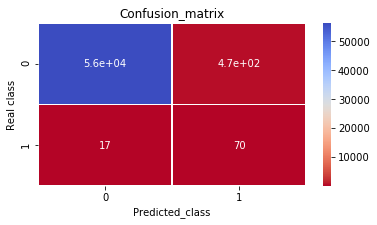


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     56875
          1       0.13      0.80      0.22        87

avg / total       1.00      0.99      0.99     56962



In [31]:
cnn_5 = CondensedNearestNeighbour(n_neighbors=5, random_state = 1)
X_train_cnn5, y_train_cnn5 = cnn_5.fit_sample(X_train, y_train)

log = LogisticRegression()
log_cnn5 = log.fit(X_train_cnn5, y_train_cnn5)

log_pred_cnn5 = log_cnn5.predict(X_test)

model_scores(y_test, log_pred_cnn5)

<a id='2.1.2'></a>
### Over_sampling Data

Over-sampling will randomly replicate minority class values to increase the sample size. Since it is replicating instances, we have to keep in mind that variables will now appear to have lower variance. However, because we are replicating instances it also means we are replicating the number of errors. So when a classifier makes a false negative error, the new sampled dataset will not make new errors for that replicated point.

**Random Over_sampling**: 

This method is similar to the way random under_sampling works, however in this case it duplicates instances in the minority class at random.

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
ros = RandomOverSampler(random_state = 1)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

print('Original Training set & Random Over Sample set:', [len(y_train), len(y_train_ros)])

('Original Training set & Random Over Sample set:', [227845, 454880])


In [26]:
logistic_model(X_train_ros, y_train_ros, X_test, y_test)

Accuracy Score: 0.981636880728

Average Precision Score: 0.0614059467273

Average F1 Score: 0.128333333333


In [67]:
ros_pipe = make_pipeline(RandomOverSampler(random_state=1), LogisticRegression())
scores_f1 = cross_val_score(ros_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

('Average Cross Validated F1 Score:', 0.11475340047207494)


Accuracy Score: 0.975667989185773

Average Precision Score: 0.042635309764672176

Average F1 Score: 0.09530026109660573


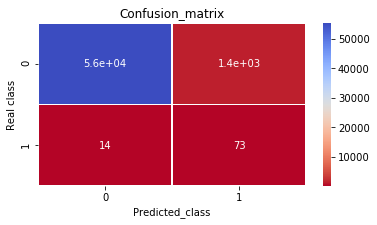


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     56875
          1       0.05      0.84      0.10        87

avg / total       1.00      0.98      0.99     56962



In [35]:
ros = RandomOverSampler(random_state = 1)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

log = LogisticRegression()
log_ros = log.fit(X_train_ros, y_train_ros)

log_pred_ros = log_ros.predict(X_test)

model_scores(y_test, log_pred_ros)

**SMOTE** (Synthetic Minority Oversampling TEchnique):

This techniques creates new data points from the minority class by interpolating between existing ones. Only used for continuous data.
1. It ignores the majority class
2. Then for every minority instance it selects K-nearest neighbors
3. Then creates new data points from the first instance to each of its k-nearest neighbors

In [38]:
from imblearn.over_sampling import SMOTE

In [27]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_train_sm)))
print(y_train_sm.shape, X_train_sm.shape)

Resampled dataset shape Counter({0: 227440, 1: 227440})
((454880L,), (454880L, 30L))


In [28]:
logistic_model(X_train_sm, y_train_sm, X_test, y_test)

Accuracy Score: 0.992802219023

Average Precision Score: 0.127856924235

Average F1 Score: 0.259927797834


In [72]:
sm_pipe = make_pipeline(SMOTE(), LogisticRegression())
scores_f1 = cross_val_score(sm_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

('Average Cross Validated F1 Score:', 0.19015121164382262)


In [ ]:
sm_pred = sm_pipe.predict(X_test)

model_scores(y_test, sm_pred)

Accuracy Score: 0.9861311049471577

Average Precision Score: 0.07239286100034384

Average F1 Score: 0.155982905982906


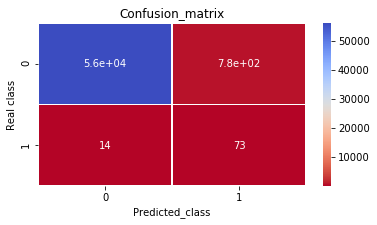


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     56875
          1       0.09      0.84      0.16        87

avg / total       1.00      0.99      0.99     56962



In [40]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

log = LogisticRegression()
log_sm = log.fit(X_train_sm, y_train_sm)

log_pred_sm = log_sm.predict(X_test)

model_scores(y_test, log_pred_sm)

<a id='2.2'></a>
# Random Forest Classifier

Random Forest is an ensemble method that will do both classification and regression. Random forest takes a subsample of the data set using a technique called bootstrapping. What bootstrap does is it keeps the same length of the data but replaces on observation with a random observation from that sample. With this technique you may get multiples of the same observation, but the idea is that you are covering the entire population. From this sample it then generates a set of decisions based on a random sample of features. It decides the threshold of the feature, and makes a split. Each of the trees MSE value is averaged together to output the accuracy.

Random Forest is a part of the CART (Classification and Regression Trees). The tree series stems off the basic idea of a decision tree with rules that split the data into different nodes.

First, the Random Forest will be run without undersample or oversample.  Then it will be run with undersample and oversample. 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### RF without undersample/oversample

As general model for comparison I want to show how well random forest performs without oversampling and undersampling.

In [47]:
rf_params = {
    'n_estimators' : [100, 150],
    'max_depth': [5, 7],
    'min_samples_split' : [2, 3],
}

Accuracy Score: 0.999508444226

Average Precision Score: 0.681327149269

Average F1 Score: 0.818181818182


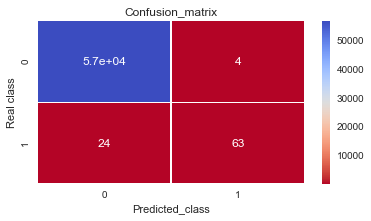


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.94      0.72      0.82        87

avg / total       1.00      1.00      1.00     56962



In [48]:
rf = RandomForestClassifier(n_jobs=-1)
rf_grid = GridSearchCV(rf, param_grid=rf_params)
rf_model = rf_grid.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

model_scores(y_test, rf_pred)

<a id='2.2.1'></a>
### RF with CondensedNearestNeighbour - undersampling

In [21]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [73]:
ckk = CondensedNearestNeighbour(n_neighbors=5, random_state = 1)
X_train_cnn5, y_train_cnn5 = ckk.fit_sample(X_train, y_train)

print('Original Training set & Condensed Nearest Neighbor Sample set:', [len(y_train), len(y_train_sample)])

('Original Training set & Condensed Nearest Neighbor Sample set:', [227845, 810])


In [90]:
rf_params = {
    'n_estimators' : np.arange(50, 150, 10),
    'max_depth': np.arange(5, 7, 1),
    'min_samples_split' : [2, 3],
}

Accuracy Score: 0.997893332397

Average Precision Score: 0.325858208048

Average F1 Score: 0.538461538462


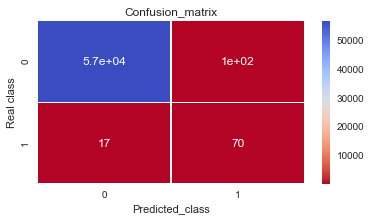


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.40      0.80      0.54        87

avg / total       1.00      1.00      1.00     56962



In [91]:
rf_1 = RandomForestClassifier(n_jobs=-1)
rf_grid_1 = GridSearchCV(rf_1, param_grid=rf_params)
rf_model_1 = rf_grid_1.fit(X_train_cnn5, y_train_cnn5)

rf_pred_1 = rf_model_1.predict(X_test)

model_scores(y_test, rf_pred_1)

<a id='2.2.2'></a>
### RF with SMOTE - oversampling

In [20]:
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(random_state=1)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [44]:
rf_params = {
    'n_estimators' : np.arange(100, 150, 10),
    'max_depth': np.arange(5, 10, 1),
    'min_samples_split' : [2, 3],
}

Accuracy Score: 0.9984375548611355

Average Precision Score: 0.41411654520605556

Average F1 Score: 0.6212765957446809


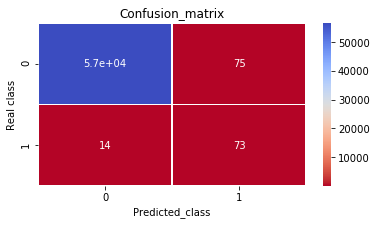


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.49      0.84      0.62        87

avg / total       1.00      1.00      1.00     56962



In [45]:
rfs = RandomForestClassifier()
rfs_grid = GridSearchCV(rfs, param_grid=rf_params)
rfs_model = rfs_grid.fit(X_train_sm, y_train_sm)

rfs_pred = rfs_model.predict(X_test)

model_scores(y_test, rfs_pred)

<a id='2.3'></a>
# Support Vector Classifier

Is a form of support vectore machines, which are very effective in high dimensional spaces and is memory effecient by using a subset of training points in the decision function. The classifier uses the same type of kernel function. 

If it is radial basis function then it uses an activation function to project n-dimensions of feature space. It then tries to optimize the boundaries on either side of the decision line with an expected error value. It can also include gradient descent where it attempts to fit coefficient weights by the finding the optimum local minimum. 

The linear function does not transorm the data into n-dimesions but it attempts to create a linear line through the data. If there are multiple classes then it becomes a one-verse-all method. 

**Parameters:**

**C**: is the penalty parameter, which trades off misclassification. A low C makes the decision surface smooth, white high C aims at classifying all training examples correctly. This allows the model to select more or less samples as support vectors.

**kernel**: is the type of kernel function or algorthim that would be applied to svc. For instance if it is linear there will be no activation function applied, which in other words it would not bring the feature space to n-dimension transformation. 

**gamma**: shows how far the influence of the training data point reaches. Low values mean far and high values mean close.

**step_out**: step size when extrapolating, used with kind:svm. Extrapolate means to estimate something by assuming that the current method will remain applicable for further instances outside of data scope. 

**kind**: the type of SMOTE algorithm, which would be 'regular', 'svc', 'borderline1', or 'borderline2'.

In [17]:
#imports
from sklearn.svm import SVC

### SVC without undersampling/ oversampling

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [68]:
svc_params = {
    'C': np.arange(0.1, 5, 0.5),
    'kernel': ['rbf'],
    'gamma': np.arange(0.1, 5, 0.5),
    'max_iter':[1000]
}

In [70]:
svc_clf = SVC()
svc_grid = GridSearchCV(svc_clf, param_grid=svc_params)
#svc_model = svc_grid.fit(X_train, y_train)

#svc_pred = svc_model.predict(X_test)

#model_scores(y_test, svc_pred)

Accuracy Score: 0.998542888241

Average Precision Score: 0.047434123253

Average F1 Score: 0.0879120879121


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       1.00      0.05      0.09        87

avg / total       1.00      1.00      1.00     56962

<a id='2.3.1'></a>
### SVC with CondensedNearestNeighbour - undersampling

In [37]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(n_neighbors=10, random_state = 1)
X_train_cnn10, y_train_cnn10 = cnn.fit_sample(X_train, y_train)

print('Original Training set & Condensed Nearest Neighbor Sample set:', [len(y_train), len(y_train_cnn10)])

Original Training set & Condensed Nearest Neighbor Sample set: [227845, 1063]


In [39]:
X_train_cnn10=pd.DataFrame(data=X_train_cnn10)

In [40]:
X_train_cnn10.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,36379.0,0.960045,-1.701390,0.090809,-2.416616,-1.778207,-1.187327,-0.352306,-0.313573,1.055548,...,0.001703,-0.208095,-0.342909,-0.261466,0.414765,0.551794,-0.760302,0.067309,0.072245,242.72
1,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
2,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
3,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
4,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00


In [43]:
X_train_cnn10.columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [44]:
#X_train_cnn10_1 = pd.DataFrame(X_train_cnn10,columns='Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount'.split())

In [46]:
X_train_cnn10.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,36379.0,0.960045,-1.701390,0.090809,-2.416616,-1.778207,-1.187327,-0.352306,-0.313573,1.055548,...,0.001703,-0.208095,-0.342909,-0.261466,0.414765,0.551794,-0.760302,0.067309,0.072245,242.72
1,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
2,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
3,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
4,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00


In [47]:
X_train_cnn10.set_index('Time', inplace=True)

In [48]:
X_train_cnn10.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,,,,,,,,,,,,,,,,,,,,,
36379.0,0.960045,-1.701390,0.090809,-2.416616,-1.778207,-1.187327,-0.352306,-0.313573,1.055548,-0.919723,...,0.001703,-0.208095,-0.342909,-0.261466,0.414765,0.551794,-0.760302,0.067309,0.072245,242.72
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00


In [50]:
del X_train_cnn10.index.name

In [51]:
X_train_cnn10.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
36379.0,0.960045,-1.701390,0.090809,-2.416616,-1.778207,-1.187327,-0.352306,-0.313573,1.055548,-0.919723,...,0.001703,-0.208095,-0.342909,-0.261466,0.414765,0.551794,-0.760302,0.067309,0.072245,242.72
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00


In [52]:
y_train_cnn10

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
y_train_cnn10.shape

(1063,)

In [ ]:
#y_train_cnn5_1 = np.delete(y_train_cnn5, [0])

In [60]:
X_test.shape

(56962, 30)

In [61]:
X_test.drop('Time', axis=1, inplace=True)

In [62]:
X_test.shape

(56962, 29)

In [54]:
svc_params = {
    'C': [0.5, 1, 1.5, 2],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 3, 5],
    'max_iter':[1000]
}

Accuracy Score: 0.21210631649169623

Average Precision Score: 0.0016917730738400614

Average F1 Score: 0.003419638495359062


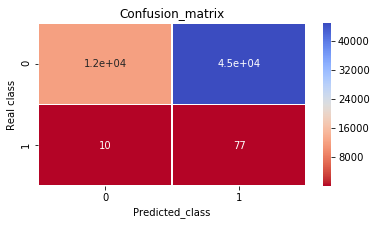


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.21      0.35     56875
          1       0.00      0.89      0.00        87

avg / total       1.00      0.21      0.35     56962



In [63]:
svc = SVC()
svc_grid = GridSearchCV(svc, param_grid=svc_params)
svc_model_cnn10 = svc_grid.fit(X_train_cnn10, y_train_cnn10)

svc_pred_cnn10 = svc_model_cnn10.predict(X_test)

model_scores(y_test, svc_pred_cnn10)

<a id='2.3.2'></a>
### SVC with SMOTE - oversampling

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [128]:
svc_params_2 = {
    'C': [0.5, 1, 1.5, 2],
    'kernel': ['rbf', 'linear'],
    'gamma': [1, 3, 5],
    'max_iter':[1000]
}

In [133]:
X_train_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
1,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
2,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
3,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
4,115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [134]:
X_train_smote_1 = X_train_smote.set_index(0)

In [135]:
X_train_smote_1.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,,,,,,,,,,,,,,,,,,,,,
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [136]:
X_train_smote_1.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [137]:
del X_train_smote_1.index.name

In [138]:
X_train_smote_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [139]:
X_train_smote_1.shape

(454880, 29)

In [140]:
X_test.shape

(56962, 29)

Accuracy Score: 0.997682665637

Average Precision Score: 0.0321428378131

Average F1 Score: 0.175


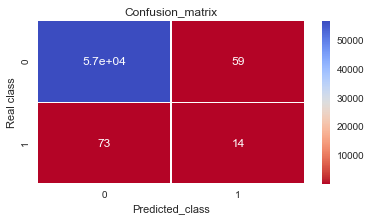


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.19      0.16      0.17        87

avg / total       1.00      1.00      1.00     56962



In [141]:
svc = SVC()
svc_grid_smote = GridSearchCV(svc, param_grid=svc_params_2)
svc_model_smote = svc_grid_smote.fit(X_train_smote_1, y_train_smote)

svc_pred_smote = svc_model_smote.predict(X_test)

model_scores(y_test, svc_pred_smote)

<a id='2.4'></a>
# XGBoost

'Extreme Gradient Boosting' is another ensemble method that can handle both regression and classification. XGBoost is known for its speed and model performance. New models are added to the original to correct errors made by the original. Gradient boosting creates new models that predict the errors of the previous model and add them together for the final prediction. XGBoost uses gradient descent algorithm to minimize the loss when adding the new models. Gradient Descent is an itterative optimization algorithm that uses learning rate to find the optimal local minimum.

In [44]:
from xgboost.sklearn import XGBClassifier

XGBoost without undersampling/ oversampling

In [47]:
xg_params = {
    'colsample_bytree': [0.2],
    'gamma':[0.01],
    'learning_rate':[0.001, 0.01],
    'max_depth':np.arange(3,7,1),
    'n_estimators':[4000, 5000],                                                                  
    'reg_alpha':[0.5,0.9],
    'reg_lambda':[0.3, 0.4, 0.5],
    'subsample': [0.2]
}

In [57]:
xg_params = {
    'colsample_bytree': [0.2],
    'learning_rate':[0.001, 0.01],
    'max_depth':np.arange(3,4,1),
    'n_estimators':[1,2],                                                                  
}

Accuracy Score: 0.999104666269

Average Precision Score: 0.461844836609

Average F1 Score: 0.675159235669


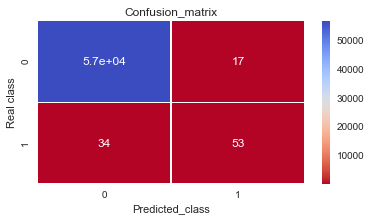


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56875
          1       0.76      0.61      0.68        87

avg / total       1.00      1.00      1.00     56962



In [58]:
xgb_clf = XGBClassifier()
xgb_grid = GridSearchCV(xgb_clf, param_grid=xg_params)
xgb_model = xgb_grid.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

model_scores(y_test, xgb_pred)

<a id='2.4.1'></a>
### XGBoost with CondensedNearestNeighbour - undersampling

In [70]:
y = df['Class']
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13367,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
31788,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
84796,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
6243,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
162432,115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [81]:
X_train_cnn5.head()

,0.96004477841,-1.70139046508,0.0908094234302,-2.41661619494,-1.77820654553,-1.18732680223,-0.352306213855,-0.313572547083,1.05554792428,-0.919723163939,...,0.00170311193799,-0.208095442515,-0.342908830246,-0.261466166547,0.414764864706,0.551794005848,-0.760301537445,0.0673091880764,0.0722448856884,242.72
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [ ]:
X_train_cnn5.head()

In [76]:
X_train_cnn5_1 = pd.DataFrame(X_train_cnn5,columns='Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount'.split())

In [23]:
ckk = CondensedNearestNeighbour(n_neighbors=5, random_state = 1)
X_train_cnn5, y_train_cnn5 = ckk.fit_sample(X_train, y_train)

In [65]:
X_train_cnn5 = pd.DataFrame(data=X_train_cnn5)

In [66]:
X_train_cnn5.head()

,0.96004477841,-1.70139046508,0.0908094234302,-2.41661619494,-1.77820654553,-1.18732680223,-0.352306213855,-0.313572547083,1.05554792428,-0.919723163939,...,0.00170311193799,-0.208095442515,-0.342908830246,-0.261466166547,0.414764864706,0.551794005848,-0.760301537445,0.0673091880764,0.0722448856884,242.72
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [24]:
xg_params = {
    'colsample_bytree': [0.2],
    'gamma':[0.01],
    'learning_rate':[0.001, 0.01],
    'max_depth':np.arange(3,7,1),
    'n_estimators':[4000, 5000],                                                                  
    'reg_alpha':[0.5,0.9],
    'reg_lambda':[0.3, 0.4, 0.5],
    'subsample': [0.2]
}

In [28]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [89]:
y_train_cnn5.shape

(1352L,)

In [92]:
y_train_cnn5_1 = np.delete(y_train_cnn5, [0])

In [93]:
X_train_cnn5_1.shape

(1351, 30)

In [96]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [97]:
X_test.drop('Time', axis=1, inplace=True)

In [99]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [102]:
y_test.head()

169876    0
127467    0
137900    0
21513     0
134700    0
Name: Class, dtype: int64

Accuracy Score: 0.991415329518

Average Precision Score: 0.0892348341273

Average F1 Score: 0.207455429498


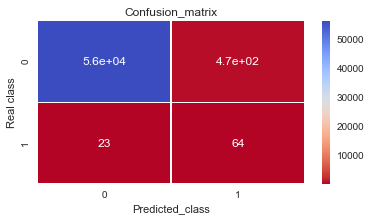


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     56875
          1       0.12      0.74      0.21        87

avg / total       1.00      0.99      0.99     56962



In [103]:
xgb = XGBClassifier()
xgb_grid_cnn5 = GridSearchCV(xgb, param_grid=xg_params)
xgb_model_cnn5 = xgb_grid_cnn5.fit(X_train_cnn5, y_train_cnn5_1)

xgb_pred_cnn5 = xgb_model_cnn5.predict(X_test)

model_scores(y_test, xgb_pred_cnn5)

<a id='2.4.2'></a>
### XGBoost with  SMOTE- oversampling

In [105]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [106]:
X_train_smote = pd.DataFrame(data=X_train_smote)

In [108]:
X_train_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
1,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
2,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
3,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
4,115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [111]:
X_train_smote_1 = X_train_smote.set_index(0)

In [112]:
X_train_smote_1.head()

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
0,,,,,,,,,,,,,,,,,,,,,
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [113]:
X_train_smote_1.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [116]:
del X_train_smote_1.index.name

In [117]:
X_train_smote_1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,0.488238,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,-0.456468,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,0.050471,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,-1.666708,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,-1.146686,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [118]:
X_train_smote_1.shape

(454880, 29)

In [119]:
y_train_smote.shape

(454880L,)

In [ ]:
xg_params = {
    'colsample_bytree': [0.2],
    'gamma':[0.01],
    'learning_rate':[0.001, 0.01],
    'max_depth':np.arange(3,7,1),
    'n_estimators':[4000, 5000],                                                                  
    'reg_alpha':[0.5,0.9],
    'reg_lambda':[0.3, 0.4, 0.5],
    'subsample': [0.2]
}

Accuracy Score: 0.975825989256

Average Precision Score: 0.0376052424411

Average F1 Score: 0.0898876404494


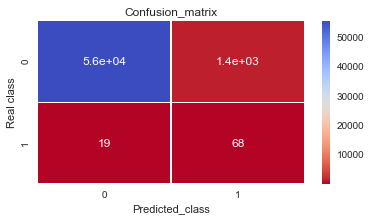


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     56875
          1       0.05      0.78      0.09        87

avg / total       1.00      0.98      0.99     56962



In [122]:
xgb = XGBClassifier()
xgb_grid_smote = GridSearchCV(xgb, param_grid=xg_params)
xgb_model_smote = xgb_grid_smote.fit(X_train_smote_1, y_train_smote)

xgb_pred_smote = xgb_model_smote.predict(X_test)

model_scores(y_test, xgb_pred_smote)

<a id='2.5'></a>
# Neural Network

Neural networks are modeled after biological neural networks and attempt to allow computers to learn in asimilar manner to humans. This is called reinforcement learning.  Use cases for neural networks include pattern recognition, time series predictions, signal processing, image recognition, and anomaly detection.

The basic structure of a Artificial Neural Networks (ANN) is an input layer, hidden layers, and an output layer.  Real values from the data go in the input layer. The hidden layer is the Layers in between input and output. Three or more hidden layers is a deep network. Final estimate of the output is in the output layer. The ReLu and tanh activation functions tend to have the best performance.

Cost functions, which will allow us to measure how well these neurons are performing. It measures how far off we are from the expected value. We can use our neurons and the measurement of error (our cost function) and then attempt to correct our prediction using Gradient Descent. Gradient descent is an optimization algorithm for finding the minimum of a function. To find a local minimum, we take steps proportional to the negative of the gradient. Using gradient descent we can figure out the best parameters for minimizing our cost, for example, finding the best values for the weights of the neuron inputs.

We use back propagation to quickly adjust the optimal parameters or weights across our entire network. Backpropagation works by calculating  the error at the output and then distributes back through the network layers. It relies heavily on the chain rule to go back through the network and calculate these errors. 


In [71]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [87]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [72]:
# Set up the model: model
model = Sequential()

In [73]:
# pandas function to read in a csv file
df = pd.read_csv('creditcard.csv')

In [74]:
target = df['Class']
predictors = df.iloc[:,:-1]

In [75]:
target = np.array( target, dtype=np.int ) 
predictors = np.array( predictors, dtype=np.float32 )

In [76]:
# Set up the model: model
model = Sequential()

In [81]:
# Add the first layer
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))

In [82]:
# Add the second layer
model.add(Dense(100, activation='relu'))

In [83]:
# Add the third layer
model.add(Dense(100, activation='relu'))

In [84]:
# Add the output layer
model.add(Dense(1))

In [85]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='sgd, metrics=['accuracy'])
    
    # Define early_stopping_monitor
    early_stopping_monitor = EarlyStopping(patience=2)

    # Fit the model
    model.fit(predictors, target, validation_split=.3, epochs=30, callbacks=[early_stopping_monitor])



Testing model with learning rate: 0.000001

Train on 199364 samples, validate on 85443 samples
Epoch 1/30
199364/199364 [==============================] - 10s - loss: 1.0792 - acc: 5.0160e-06 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 2/30
199364/199364 [==============================] - 10s - loss: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 3/30
199364/199364 [==============================] - 10s - loss: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 4/30
199364/199364 [==============================] - 10s - loss: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00


Testing model with learning rate: 0.010000

Train on 199364 samples, validate on 85443 samples
Epoch 1/30
199364/199364 [==============================] - 10s - loss: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0204 - val_acc: 0.0000e+00
Epoch 2/30
199364/199364 [==============================] - 10s - loss: 0.0310 - acc: 0.0000e+00 - val_loss: 0.0204 

## Results

The six different algorithms that were used in this study were logistic regression, random forest classifer, support vector classifier, XGBoost, and Neural Networks. The oversampling techniques were random over sampling and synthetic minority oversampling techinque (SMOTE). The undersampling techniques were random under sampling, edited nearest neighbor, and condensed nearest neighbors. I focused on the f1 score in my analysis.  It is also a valid measure of an accurate model. It is the harmonic mean of precision and recall, and will be more insensitive to imbalanced data.

Of the six different algorithms that were used to predict this imbalanced data seet, the best algorithm was random forest classifier, without under or oversampling, with an average F1 score of .82.  Second place went to XGBoost without under or oversampling with an average F1 score of .68. Third place went to logistic regression utilizing an L1 regularization penalty with an average F1 score of .66 and logistic regression with under sampling utilizing edited nearest neighbors also with an average F1 score of .66. Fourth place went to Random Forest Classifier with oversampling using SMOTE with an average F1 score of .62. 